#### Disclaimer: The data were collected from the Taiwan Economic Journal for the years 1999to 2009.Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Dataset description: It has 96 columns of data 

The first attribute is Y, class label <br>
X1 Cost of Interest-bearing Debt <br>
X2 Cash Reinvestment Ratio <br>
X3 Current Ratio <br>
X4 Acid Test <br>
X5 Interest Expenses/Total Revenue <br>
X6 Total Liability/Equity Ratio <br>
X7 Liability/Total Assets <br>
X8 Interest-bearing Debt/Equity <br>
X9 Contingent Liability/Equity <br>
X10 Operating Income/Capital <br>
... <br>
X95 Return on Total Asset Growth <br>

#### Task: You will use the Taiwanese Bankruptcy Prediction data set. The dataset correspondsto a classification problem on which you need to make predictions on the basis of whetherthe company can have a risk to bankrupt considering features in the dataset. You are asked to use this data to build Bagging Classifier and Boosting Classifiers model.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report


from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from xgboost import XGBClassifier


from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler


import warnings
warnings.filterwarnings('ignore')


pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [28]:
data=pd.read_csv('files/data.csv')
df=data.copy()

In [29]:
df.shape

(6819, 96)

In [30]:
df.isna().sum().sum()

0

In [31]:
df.duplicated().sum()

0

In [32]:
df.columns=map(lambda x: x.lower().strip().replace(" ","_"),df.columns)
df.columns

Index(['bankrupt?', 'roa(c)_before_interest_and_depreciation_before_interest',
       'roa(a)_before_interest_and_%_after_tax',
       'roa(b)_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre-tax_net_interest_rate',
       'after-tax_net_interest_rate',
       'non-industry_income_and_expenditure/revenue',
       'continuous_interest_rate_(after_tax)', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest-bearing_debt_interest_rate', 'tax_rate_(a)',
       'net_value_per_share_(b)', 'net_value_per_share_(a)',
       'net_value_per_share_(c)', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_(yuan_¥)',
       'operating_profit_per_share_(yuan_¥)',
       'per_share_net_profit_before_tax_(yuan_¥)',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after-tax

### Explatory Data Analyses

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt?                                                6819 non-null   int64  
 1   roa(c)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   roa(a)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   roa(b)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   operating_gross_margin                                   6819 non-null   float64
 5   realized_sales_gross_margin                              6819 non-null   float64
 6   operating_profit_rate                                    6819 non-null   float64
 7   pre-tax_net_interest_rate                                6819 non-null   float64
 8   after-tax_net_interest_rate 

In [34]:
## 3 int deyer var qalan hamsi floatdir. Buna gore aydinlasdiririq ki, o deyerler nedir

df['bankrupt?'].value_counts() # datada inbalance var

0    6599
1     220
Name: bankrupt?, dtype: int64

In [35]:
df['liability-assets_flag'].value_counts() # datada inbalance var, amma silmirik cunki spesifik hal olmush ola biler

0    6811
1       8
Name: liability-assets_flag, dtype: int64

In [36]:
df['net_income_flag'].value_counts() # butun sira eyni deyer olduquna gore drop edirik, hec bir menasi yoxdu

1    6819
Name: net_income_flag, dtype: int64

In [37]:
df.drop('net_income_flag',inplace=True,axis=1)

[None]

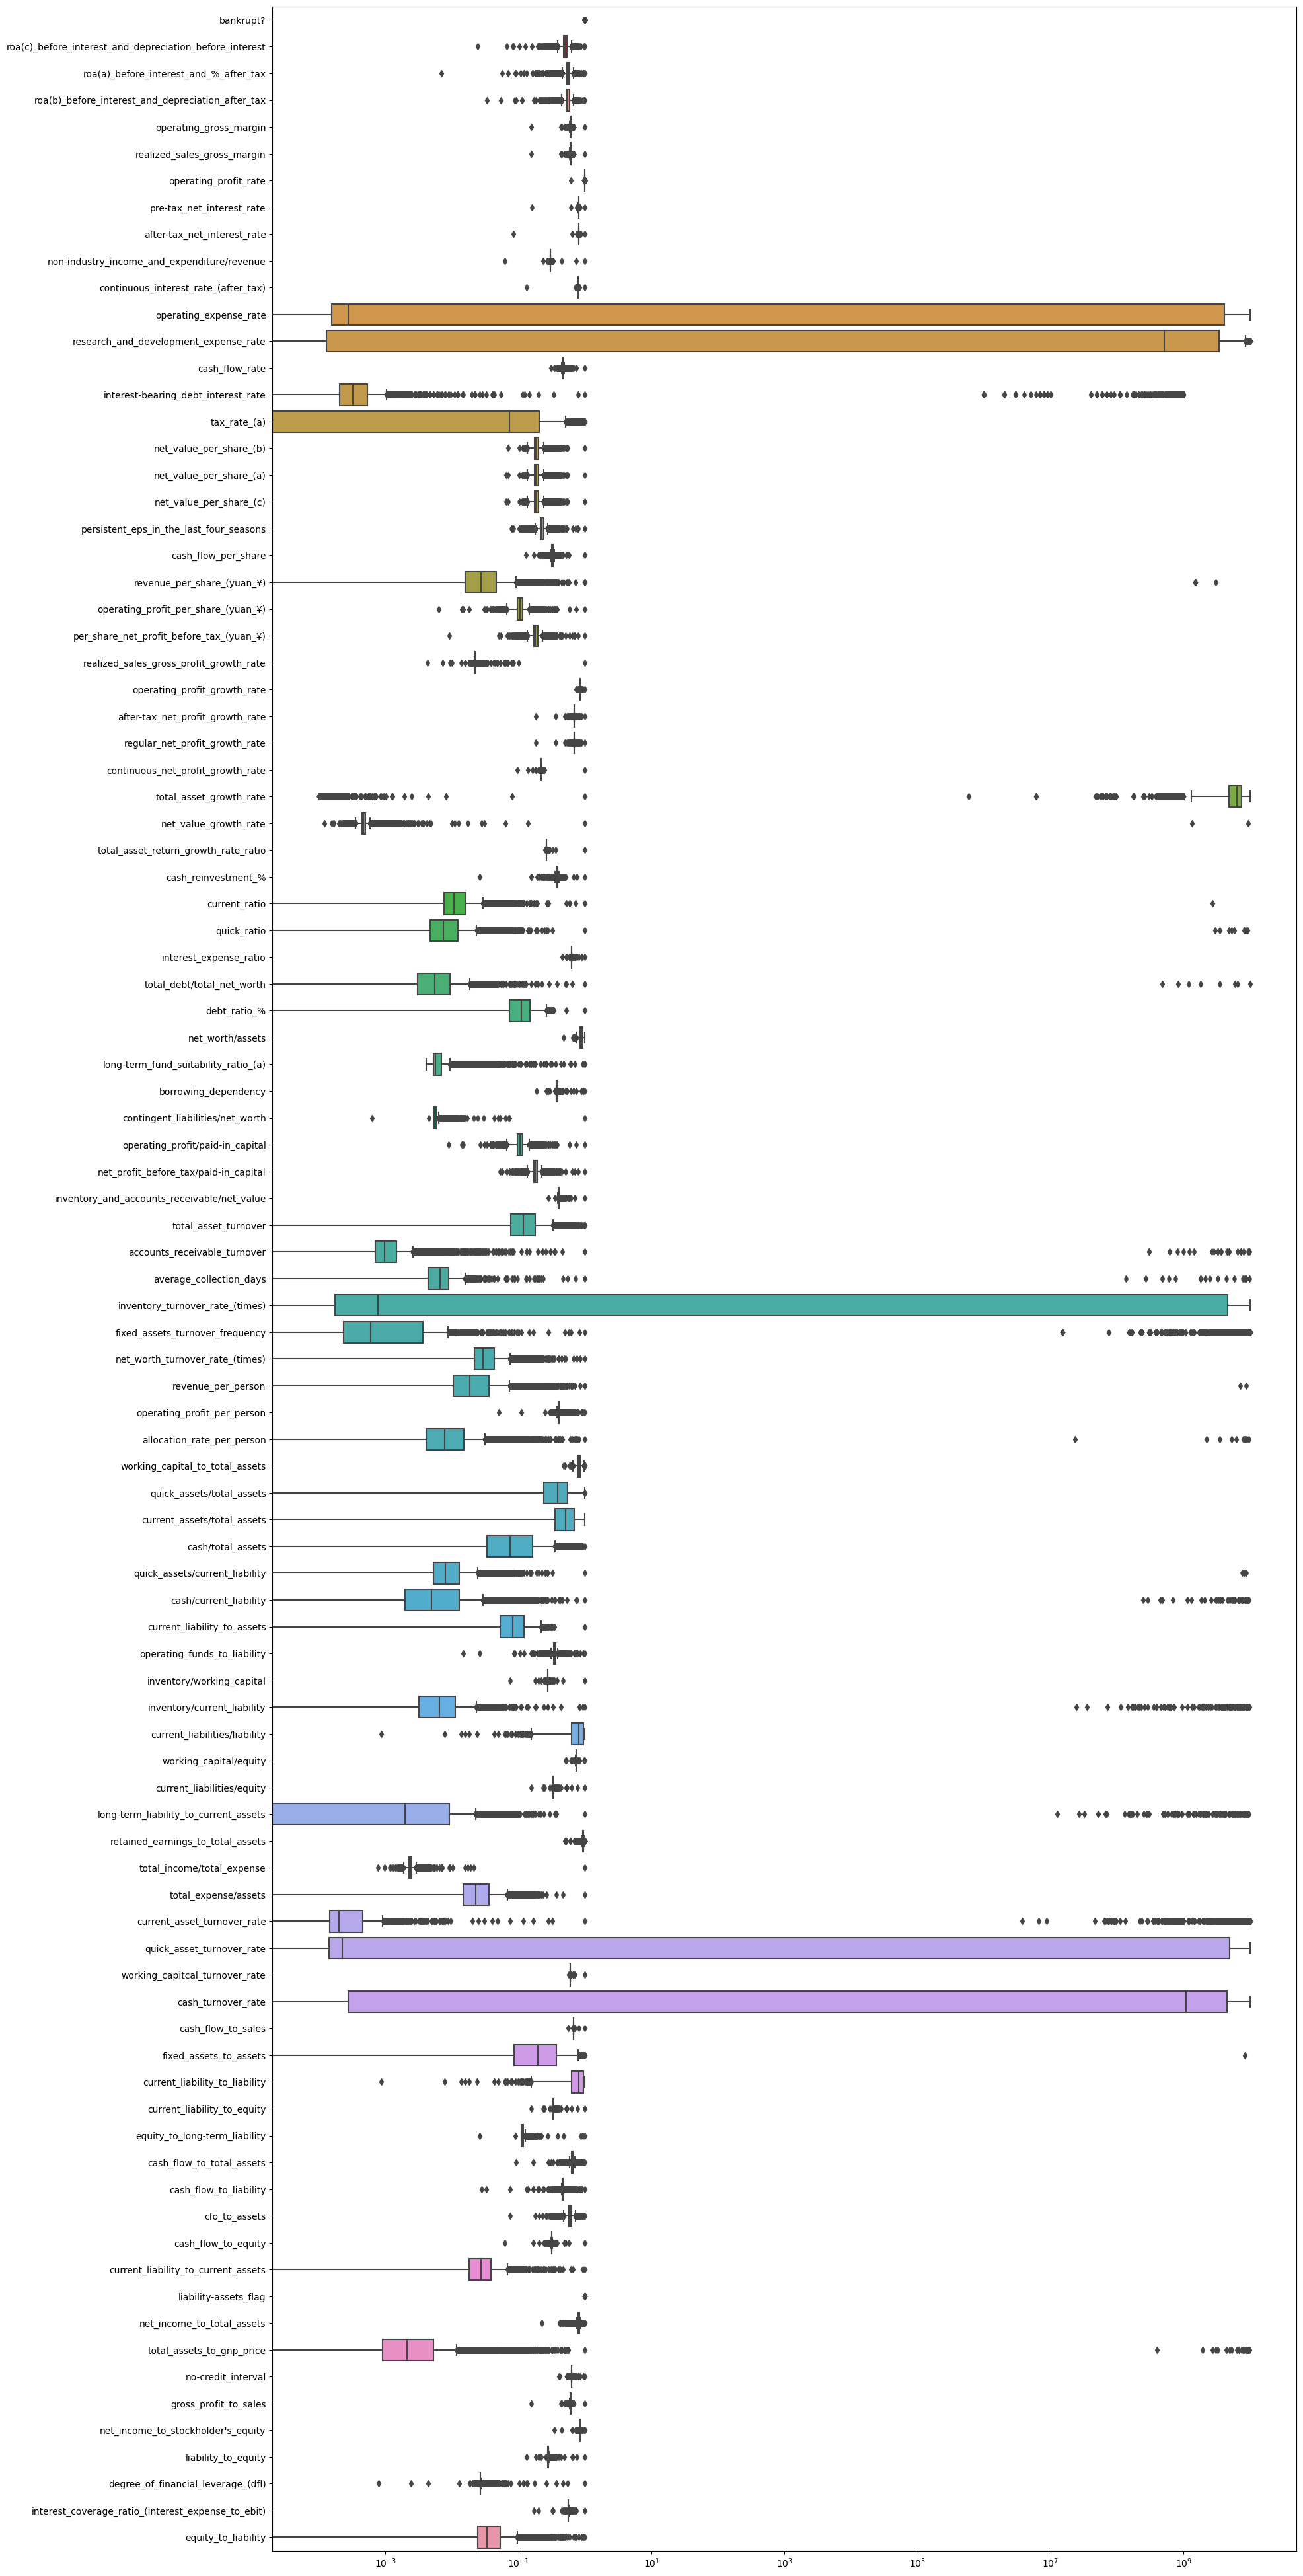

In [38]:
plt.figure(figsize=(20,50))
ax=sns.boxplot(data=df,orient='h')
ax.set(xscale='log')


#### datada dehset cox outlier var, amma sile bilmerik cunki data tam iter. RobustScaler istifade edeceyik

In [39]:
y=df['bankrupt?']
X=df.drop('bankrupt?',axis=1)
scaler=RobustScaler()
X.iloc[:,:]=scaler.fit_transform(X)
X

,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a),net_value_per_share_(b),net_value_per_share_(a),net_value_per_share_(c),persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_(yuan_¥),operating_profit_per_share_(yuan_¥),per_share_net_profit_before_tax_(yuan_¥),realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_%,net_worth/assets,long-term_fund_suitability_ratio_(a),borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_(times),fixed_assets_turnover_frequency,net_worth_turnover_rate_(times),revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets/total_assets,current_assets/total_assets,cash/total_assets,quick_assets/current_liability,cash/current_liability,current_liability_to_assets,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_assets,retained_earnings_to_total_assets,total_income/total_expense,total_expense/assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability-assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),equity_to_liability
0,-2.237820,-2.525674,-2.578427,-0.337079,-0.337006,-0.423237,-2.987097,-3.588770,-7.392276,-3.856786,-3.668564e-14,-0.147536,-0.734328,1.226100e+00,-0.357020,-1.404221,-1.404221,-1.405361,-2.298039,-0.995122,-0.319468,-0.413793,-1.771987,-0.001070,1.094115,-1.216919,-1.218580,-1.492314,-0.561265,-2.311538,-1.508642,-1.393704,-0.955675,-0.824744,-1.455941,2.508623,1.266826,-1.266826,-0.399178,2.893714,2.792049,-0.416102,-1.830733,-0.293131,-0.313433,1.136240,-0.672687,-1.260999e-13,-1.393805e-01,0.160305,0.611625,-0.317117,2.687295,-1.807453,-0.735977,-0.964253,-0.555109,-0.766700,-4.390973e-01,0.975566,-0.733036,-0.652438,-0.684069,-0.414582,-2.978558,2.222107,2.622462e+00,-2.511710,-1.227520,1.974517,2.283604e+12,1.336735e+00,-1.947225,-0.137916,-0.295693,0.792515,-0.414582,2.222107,2.301930,-0.262147,-0.160266,-1.239911,-0.434548,4.456691,0.0,-3.156866,1.633983,-1.880597,-0.337407,-5.926656,2.535950,-1.700396,-2.122174,-0.611011
1,-0.650702,-0.402644,-0.625530,0.314607,0.317657,-0.608575,-0.432258,-0.472337,0.260163,-0.765196,2.901374e-15,-0.147536,-0.340082,9.893778e-01,-0.357020,-0.082792,-0.082792,-0.082859,-0.647059,-0.400000,-0.202806,-0.523327,-0.423453,-0.250557,0.320374,0.674315,0.698476,0.513218,-0.114625,-0.323932,0.740741,-0.310144,-0.524526,-0.448360,8.721629,1.110092,0.787336,-0.787336,-0.377712,0.677662,1.177370,-0.52413

In [40]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=2, stratify=y)
# stratify - datada proportionu qoruyur. 1-0 trainde 30/70 olarsa testde de 30/70 olsun
# bu halda amma tekce stratify yeterli olmur cunki datada guclu inbalance problemi var.
# onu diger setirlerde hell edeceyik

### Bagging Classifier

In [41]:
svm=SVC(probability=True)
bag=BaggingClassifier(base_estimator=svm,n_estimators=10,max_samples=0.4,max_features=0.4,bootstrap=True,bootstrap_features=True,n_jobs=-1,random_state=2)

In [42]:
bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364



In [43]:
random_forest=RandomForestClassifier()
bag1=BaggingClassifier(base_estimator=random_forest,n_estimators=10,max_samples=0.4,max_features=0.4,bootstrap=True,bootstrap_features=True,n_jobs=-1,random_state=2)

In [44]:
bag1.fit(X_train,y_train)
y_pred=bag.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364



### Inbalance 

Hər iki model 1 tapa bilmir. Accuracy  97 olsada model 1 dənə belə 1 düz tapmayıb, çünki datada inbalance problemi var yəni 0 sayı 1 dən qat qat çoxdur



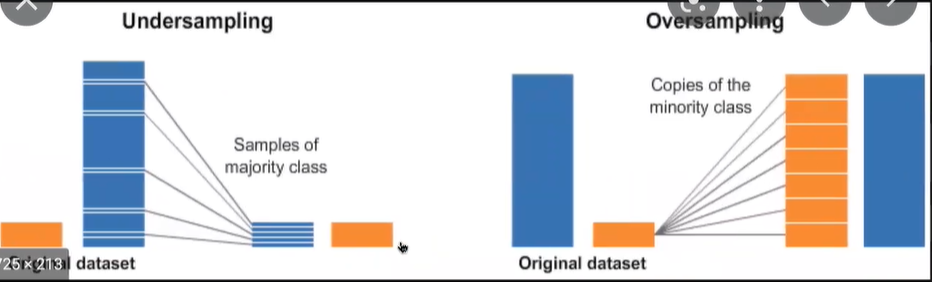

#### undersampling

In [45]:
undersample=NearMiss(version=1,n_neighbors=3)
X_train_us,y_train_us=undersample.fit_resample(X_train,y_train)


In [46]:
y_train.value_counts()

0    5279
1     176
Name: bankrupt?, dtype: int64

In [47]:
y_train_us.value_counts()

0    176
1    176
Name: bankrupt?, dtype: int64

### Bagging Classifier

In [48]:
random_forest=RandomForestClassifier()
bag_us=BaggingClassifier(base_estimator=random_forest,n_estimators=10,max_samples=0.4,max_features=0.4,bootstrap=True,bootstrap_features=True,n_jobs=-1,random_state=2)

In [49]:
bag_us.fit(X_train_us,y_train_us)
bag_pred=bag.predict(X_test)
print(classification_report(y_test,bag_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364



### Boosting Classifier

In [50]:
gbc=GradientBoostingClassifier(random_state=2)
gbc.fit(X_train_us,y_train_us)
gbc_pred=bag.predict(X_test)
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364



In [51]:
xgb=XGBClassifier()
xgb.fit(X_train_us,y_train_us)
xgb_pred=bag.predict(X_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364



### Oversampling

In [52]:
ros=RandomOverSampler(random_state=2)

In [53]:
X_train_os,y_train_os=ros.fit_resample(X_train,y_train)

In [54]:
y_train_os.value_counts()

0    5279
1    5279
Name: bankrupt?, dtype: int64

In [55]:
svm=SVC(probability=True)
bag=BaggingClassifier(base_estimator=svm,n_estimators=10,max_samples=0.4,max_features=0.4,bootstrap=True,bootstrap_features=True,n_jobs=-1,random_state=2)

bag.fit(X_train_os,y_train_os)
y_pred=bag.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1320
           1       0.06      0.39      0.10        44

    accuracy                           0.77      1364
   macro avg       0.52      0.58      0.48      1364
weighted avg       0.94      0.77      0.84      1364



In [56]:
gbc=GradientBoostingClassifier(random_state=2)
gbc.fit(X_train_os,y_train_os)
gbc_pred=bag.predict(X_test)
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1320
           1       0.06      0.39      0.10        44

    accuracy                           0.77      1364
   macro avg       0.52      0.58      0.48      1364
weighted avg       0.94      0.77      0.84      1364



In [57]:
xgb=XGBClassifier()
xgb.fit(X_train_os,y_train_os)
xgb_pred=bag.predict(X_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1320
           1       0.06      0.39      0.10        44

    accuracy                           0.77      1364
   macro avg       0.52      0.58      0.48      1364
weighted avg       0.94      0.77      0.84      1364



### Advanced XGBClassifier

In [58]:
help(XGBClassifier())

Help on XGBClassifier in module xgboost.sklearn object:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: Optional[bool] = None, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 |      learni

In [59]:
xgb=XGBClassifier(n_estimators=10,learning_rate=0.9)
xgb.fit(X_train_os,y_train_os)
xgb_pred=bag.predict(X_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1320
           1       0.06      0.39      0.10        44

    accuracy                           0.77      1364
   macro avg       0.52      0.58      0.48      1364
weighted avg       0.94      0.77      0.84      1364

